# Manual Calculation of PCA

* **Step 1**: Standardize the dataset. (For the exam, only manual standardization is accepted)
* **Step 2**: Calculate the covariance matrix for the features in the dataset.
$$
\text{COV} = \frac{(X-\mu)^T (X-\mu)}{N-1} 
$$
* **Step 3**: Calculate the eigenvalues and eigenvectors for the covariance matrix.
* **Step 4**: Sort eigenvalues and their corresponding eigenvectors.
* **Step 5**: Pick $k$ eigenvalues and form a matrix of eigenvectors ($k\leq d$).
* **Step 6**: Transform the original matrix.
$$
Z = w^T (X-\mu)
$$
where $w$ is the sorted eigenvectors and $Z$ is the values in the projected space.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pca_data.csv',header=None)
df.head()

,0,1
0,0.50108,0.55352
1,0.54437,0.64930
2,0.55736,0.72817
3,0.61580,0.82394
4,0.65476,0.87465


In [3]:
df.mean()

0    0.680486
1    0.751029
dtype: float64

In [4]:
np.std(df)

0    0.100975
1    0.117394
dtype: float64

In [5]:
df_norm = pd.DataFrame(np.array((df - df.mean()) / np.std(df)))

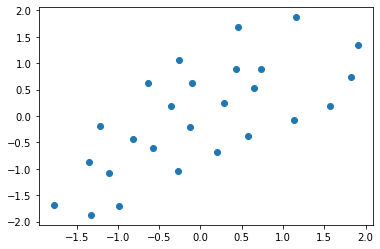

In [6]:
# plt.scatter((df[0]),(df[1]))
plt.scatter((df_norm[0]),(df_norm[1]))
plt.show()

In [7]:
# in the exam you should manully calculate it
covariance = df_norm.cov()
covariance

,0,1
0,1.040000,0.724311
1,0.724311,1.040000


In [8]:
dif = df_norm - df_norm.mean()
size = df_norm.shape[0]-1
covariance = np.dot(dif.T, dif)/size
pd.DataFrame(covariance)

,0,1
0,1.040000,0.724311
1,0.724311,1.040000


In [9]:
value, vector = np.linalg.eig(covariance)

In [10]:
vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [11]:
value

array([1.76431096, 0.31568904])

In [12]:
sorted(range(len(value)))

[0, 1]

In [13]:
vector.T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [14]:
W_T = vector.T
# sorting from the highest to lowest by its eigen values.
W_T = W_T[sorted(range(len(value)), key=lambda k: value[k], reverse=True)]
W_T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [15]:
Z = pd.DataFrame(vector.T.dot(dif.T).T)
Z.head()

,0,1
0,-2.446005,0.066672
1,-1.565938,0.340439
2,-0.999909,0.724535
3,-0.013810,0.892150
4,0.564463,0.924766


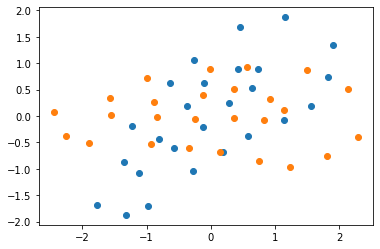

In [16]:
import matplotlib.pyplot as plt
plt.scatter((df_norm[0]),(df_norm[1]))
plt.scatter((Z[0]),(Z[1]))
plt.show()

# Package calculation

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.head()
# You can read about the reason for the negative sign of PC2 in this thread:
# https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative

,pc1,pc2
0,2.446005,-0.066672
1,1.565938,-0.340439
2,0.999909,-0.724535
3,0.013810,-0.892150
4,-0.564463,-0.924766


# Others

In [18]:
# A comment on the StandardScaler() calculation. 
# You may see a difference in its result compared to manual calculation below:
from sklearn.preprocessing import StandardScaler
df_st_package = StandardScaler().fit_transform(df)
print("The result using the package \n", df_st_package[0:5])

df_st_manual1 = np.array((df - df.mean()) / df.std())
print("\n The manual calculation Type I \n", df_st_manual1[0:5])

df_st_manual2 = np.array((df - df.mean()) / np.std(df))
print("\n The manual calculation Type II \n", df_st_manual2[0:5])

# sklearn uses numpy for standard deviation computation. It takes the denominator of n-1.
# However, It the denominator of pandas is n. It is the matter of degree of freedom.

The result using the package 
 [[-1.77673135 -1.68244272]
 [-1.34801213 -0.86655843]
 [-1.21936666 -0.19471887]
 [-0.64061058  0.62108023]
 [-0.25477319  1.05304402]]

 The manual calculation Type I 
 [[-1.74222842 -1.64977082]
 [-1.32183465 -0.84973046]
 [-1.19568738 -0.19093756]
 [-0.62817036  0.60901927]
 [-0.24982567  1.03259462]]

 The manual calculation Type II 
 [[-1.77673135 -1.68244272]
 [-1.34801213 -0.86655843]
 [-1.21936666 -0.19471887]
 [-0.64061058  0.62108023]
 [-0.25477319  1.05304402]]


### LDA 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [21]:
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

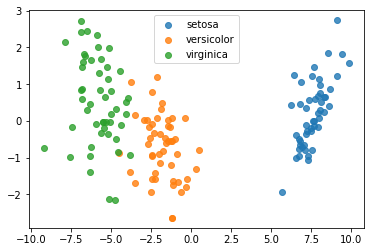

In [22]:
#create LDA plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, cmap='rainbow',
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [23]:
model.explained_variance_ratio_

array([0.9912126, 0.0087874])


# Question:

### Perform PCA on iris dataset and compare the results with LDA technique discussed in the lecture.

### Extract the variance ratio for PCA and compare against LDA

### Comment on the principle components obtained from PCA is different or same as of LDA.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


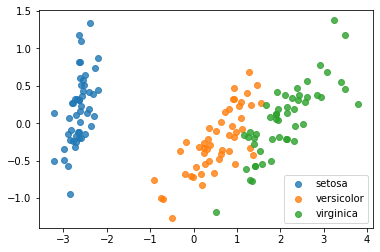

In [26]:
#create PCA plot
X = iris.data
y = iris.target
model = PCA()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, cmap='rainbow',
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display PCA plot
plt.show()

# Conclusion

***

### Perform PCA on iris dataset and compare the results with LDA technique discussed in the lecture.

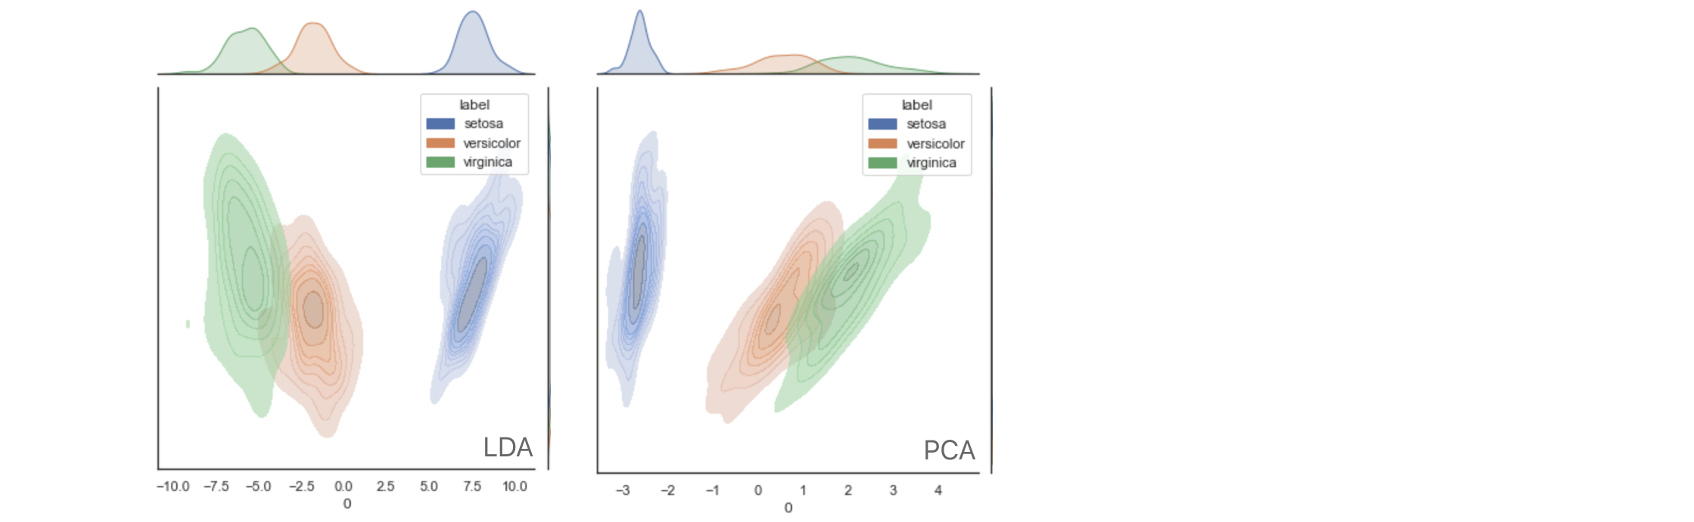

As the figure shows, LDA performs much better on its first priciple component at the ratio of 99%. As a comparation, the first priciple component of PCA didn't performs that good. Because the optimal objective is to find the orthogonal basis that best explains the sample variances. 

### Compare against the variance ratio for PCA and LDA
top components of LDA: [0.9912126 0.0087874], sum(lda.explained_variance_ratio_) = 1, which means these top two components captures 100% class separability of iris dataset.

top components of PCA: [0.92461872 0.05306648], sum(pca.explained_variance_ratio_) = 97.77%, which means thes top two components explans as much as 97.77% of the variances of the original iris sample set.

### The principle components obtained from PCA are different from those components from LDA
LDA principle components captures class separability. The ratios explains the classification performance of top LDA components.
PCA principle components explains variances of each components. Top components offers more information about the data. The higher the eigen value is, the more information the eigen vector brings.

***

top components: [0.9912126 0.0087874]


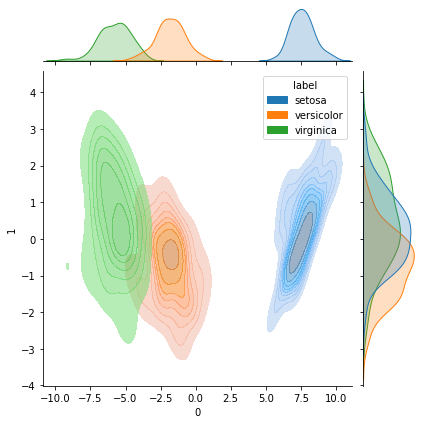

In [27]:
X = iris.data
y = iris.target
import seaborn as sns
from matplotlib import pyplot

lda = LinearDiscriminantAnalysis(n_components=None).fit(X, y)
print("="*50)
print("top components: %s" % lda.explained_variance_ratio_)
print("="*50)

lda_df = pd.DataFrame(lda.transform(X))
lda_df['label'] = pd.Categorical.from_codes(y, iris.target_names)
sns.jointplot(data=lda_df, x=0, y=1, hue="label", kind='kde', fill=True, joint_kws={'alpha': 0.5})

top components: [0.92461872 0.05306648]


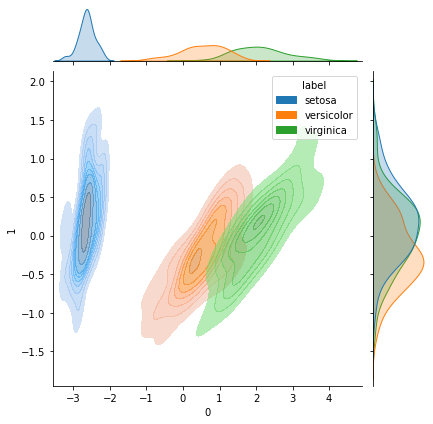

In [28]:
pca = PCA(n_components=2).fit(X, y)
print("="*50)
print("top components: %s" % pca.explained_variance_ratio_)
print("="*50)

pca_df = pd.DataFrame(pca.transform(X))
pca_df['label'] = pd.Categorical.from_codes(y, iris.target_names)
sns.jointplot(data=pca_df, x=0, y=1, hue="label", kind='kde', fill=True, joint_kws={'alpha': 0.5})